<a href="https://colab.research.google.com/github/saramony/Assignment-3/blob/master/MSDS_422_Assignment_5_Aramony_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports pandas
import pandas as pd

#Defines the URL for Github
url= 'https://raw.githubusercontent.com/saramony/Assignment-5/master/test.csv'
url2= 'https://raw.githubusercontent.com/saramony/Assignment-5/master/train.csv'

# Dataset is now stored in a Pandas Dataframe
TrainSet = pd.read_csv(url2)
TestSet = pd.read_csv(url)

#Defines the shape of the data
print("The dataset has Train", len(TrainSet), "rows and", TrainSet.shape[1], "columns")
print("The dataset has Test", len(TrainSet), "rows and", TestSet.shape[1], "columns")

The dataset has Train 42000 rows and 785 columns
The dataset has Test 42000 rows and 784 columns


In [0]:
#Describes the Train data
TrainSet.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
#Describes the Train data
TestSet.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
#downloads data in alternate form
from sklearn.datasets import fetch_openml
mnist_raw = fetch_openml('mnist_784')

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
#Defines the predictor columns
#predictors = []
#for i in range(784):
#    string = "pixel" + str(i)
#    predictors.append(string)
mnist_raw

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
from scipy.io import loadmat
#Strips out only the data and target
mnist = {    
    "data": mnist_raw["data"],
    "target": mnist_raw["target"],
    "COL_NAMES": ["data", "target"],
    "DESCR": "mldata.org dataset: mnist-original",
    }
print("Success!")

Success!


In [0]:
mnist

{'COL_NAMES': ['data', 'target'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)}

In [6]:
#Defines X and Y and defines of Train data and shape
X, y = mnist["data"], mnist["target"]
#Defines how many x variables
X.shape

(70000, 784)

In [7]:
#Defines how many Y variables
y.shape

(70000,)

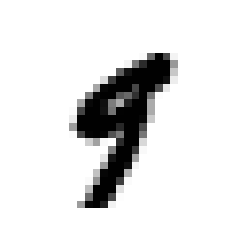

In [8]:
#Plots a sample value

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [0]:
#Defines to plot a single variable
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [0]:
# Defines functions to plot multiple variables 
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

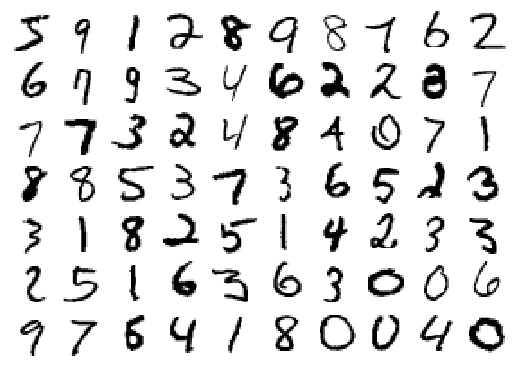

In [11]:
#plots multiple
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:42000:590]]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

In [0]:
#splits train / test
X_train, X_test, y_train, y_test = X[:42000], X[42000:], y[:42000], y[42000:]

In [13]:
#tests value
y_test.shape

(28000,)

In [14]:
#OK - now that we've plotted the data - now it's time to plot for all variables for Random Forest classifier
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=784)
clf.fit(X_train, y_train)
print("Success!")

Success!
CPU times: user 4min 6s, sys: 395 ms, total: 4min 7s
Wall time: 4min 7s


In [50]:
type(X_train)

numpy.ndarray

In [15]:
#performs cross validation 
%%time
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 7min 26s, sys: 6.03 s, total: 7min 32s
Wall time: 7min 32s


In [16]:
y_scores.shape

(42000,)

In [17]:
#Predicts accuracy from first 3 runs
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(y_train, y_scores, average="macro"))
print(precision_score(y_train, y_scores, average="macro"))
print(recall_score(y_train, y_scores, average="macro"))    

0.9634632054763623
0.9635024676120013
0.9634746189228357


In [18]:
#performs final test
%%time
y_test_scores = cross_val_predict(clf, X_test, y_test)
y_test.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 4min 44s, sys: 303 ms, total: 4min 45s
Wall time: 4min 45s


In [0]:
#Exports file to excel

import pandas as pd

## convert your array into a dataframe
RandomForest1_Output_X = pd.DataFrame (X_test)
RandomForest1_Output_Y = pd.DataFrame (y_test)

In [0]:
#exports file to CSV for Kaggle submission

from google.colab import files
RandomForest1_Output_Y.to_csv('Random Forest Model - Assignment 5 - Aramony.csv') 
files.download('Random Forest Model - Assignment 5 - Aramony.csv')

In [77]:
print("F1 Score is:",f1_score(y_test, y_test_scores, average="macro"))
print("Precision Score is:",precision_score(y_test, y_test_scores, average="macro"))
print("Recall Score is:",recall_score(y_test, y_test_scores, average="macro"))  

F1 Score is: 0.9587054876659078
Precision Score is: 0.9587678883153512
Recall Score is: 0.9586916769472131


In [20]:
from sklearn.metrics import confusion_matrix
conf_mx1 = confusion_matrix(y_test, y_test_scores)
conf_mx1

array([[2716,    0,    6,    1,    1,    3,    9,    1,   20,    3],
       [   0, 3030,   13,    8,    5,    2,    8,    6,    3,    3],
       [  16,    4, 2714,   20,   22,    4,   14,   23,   21,    5],
       [   1,    5,   44, 2720,    1,   32,    3,   25,   30,   12],
       [   4,    4,    3,    0, 2614,    1,   15,    2,    7,   75],
       [  14,    8,    8,   45,    6, 2395,   24,    3,   13,   13],
       [  14,    6,    3,    0,    7,   12, 2644,    0,   10,    0],
       [   7,   14,   46,    4,   17,    1,    0, 2825,    6,   43],
       [   7,   18,   20,   30,   14,   20,   13,    6, 2629,   28],
       [  14,   11,    7,   37,   47,   14,    1,   34,   20, 2563]])

In [0]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

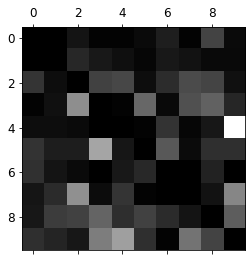

In [22]:
row_sums = conf_mx1.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx1 / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [23]:
#Performs the PCA analysis
%%time
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(mnist["data"])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

CPU times: user 26.7 s, sys: 1.46 s, total: 28.2 s
Wall time: 14.8 s


In [24]:
d

154

In [25]:
#Random Forest reduced dataset

%%time
pca = PCA(n_components = 152)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

CPU times: user 19 s, sys: 4.95 s, total: 23.9 s
Wall time: 12.3 s


In [26]:
#Produces Shape of updated
X_reduced.shape

(42000, 152)

In [70]:
#Produces the Random Forest classifier using 154 estimators
%%time
clf_2 = RandomForestClassifier(n_estimators=154)
clf_2.fit(X_reduced, y_train)
print("Success!")

Success!
CPU times: user 1min 57s, sys: 86.6 ms, total: 1min 57s
Wall time: 1min 57s


In [28]:
#Performs the cross validaion on updated Random Forest reduced datset
%%time
y_scores_2 = cross_val_predict(clf_2, X_reduced, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 3min 21s, sys: 477 ms, total: 3min 22s
Wall time: 3min 22s


In [29]:
#Chceks it ran successfully for the updated y_scores
y_scores_2.shape

(42000,)

In [0]:
#export to kaggle

RandomForest2_Output_Y = pd.DataFrame (y_scores_2)

#exports file to CSV for Kaggle submission

from google.colab import files
RandomForest1_Output_Y.to_csv('Random Forest Model - Assignment 5 - Aramony- Reduced.csv') 
files.download('Random Forest Model - Assignment 5 - Aramony- Reduced.csv')

In [30]:
#DefinesF1, Precision, and recall scores for Random Forest run
print(f1_score(y_train, y_scores_2, average="macro"))
print(precision_score(y_train, y_scores_2, average="macro"))
print(recall_score(y_train, y_scores_2, average="macro")) 

0.9363649973092041
0.9364969954077894
0.9363680373507293


In [31]:
#Runs cross val predict on x_test reduced
y_test_scores_2 = cross_val_predict(clf_2, X_test_reduced, y_test)
y_test.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(28000,)

In [78]:
#Defines the F1, Precision, Recall on X test reduced
print("F1 Score is:",f1_score(y_test, y_test_scores_2, average="macro"))
print("Precision Score is:",precision_score(y_test, y_test_scores_2, average="macro"))
print("Recall Score is:", recall_score(y_test, y_test_scores_2, average="macro")) 

F1 Score is: 0.9348855929605262
Precision Score is: 0.935081931980416
Recall Score is: 0.9348747658282109


In [33]:
#Produces confusion matrix on updated scores (Co-variance and variances)
conf_mx2 = confusion_matrix(y_test, y_test_scores_2)
conf_mx2

array([[2696,    0,    4,    6,    4,   10,   19,    6,   14,    1],
       [   0, 3018,   18,    8,    4,    4,    7,    4,   14,    1],
       [  28,    6, 2633,   40,   25,    4,   13,   27,   62,    5],
       [   4,    4,   39, 2656,    3,   60,    8,   22,   55,   22],
       [   5,   13,   12,    1, 2554,    5,   23,   11,   11,   90],
       [  16,    3,   11,  111,   23, 2296,   30,    3,   20,   16],
       [  26,    6,   14,    1,    9,   28, 2606,    0,    6,    0],
       [   7,   24,   41,    4,   29,    2,    1, 2789,   14,   52],
       [  16,   20,   29,   94,   24,   56,   13,   13, 2490,   30],
       [  18,   12,    8,   47,   92,   17,    4,   76,   18, 2456]])

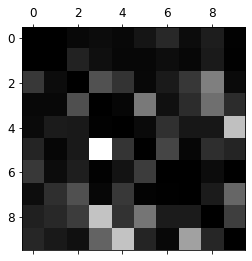

In [34]:
#Graphs the confusion matrix in gray

row_sums2 = conf_mx2.sum(axis=1, keepdims=True)
norm_conf_mx2 = conf_mx2 / row_sums2
np.fill_diagonal(norm_conf_mx2, 0)
plt.matshow(norm_conf_mx2, cmap=plt.cm.gray)
plt.show()

In [0]:
#Re-runs dimension reduction on training data $ re-run model
pca_2 = PCA()
pca_2.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d2 = np.argmax(cumsum >= 0.95) + 1

In [36]:
d2

1

In [37]:
#Re-runs the model with new data - this test performs the PCA fit transformation on estimators @ 149
%%time
pca_3 = PCA(n_components = 149)
X_train_reduced_3 = pca_3.fit_transform(X_train)
X_test_reduced_3 = pca_3.fit_transform(X_test)

CPU times: user 20.1 s, sys: 4.04 s, total: 24.1 s
Wall time: 12.5 s


In [38]:
#This performs the same test on Random Forest with modified data
%%time
from sklearn.ensemble import RandomForestClassifier
clf_3 = RandomForestClassifier(n_estimators=149)
clf_3.fit(X_train_reduced_3, y_train)
print("Success!")

Success!
CPU times: user 1min 53s, sys: 25.9 ms, total: 1min 53s
Wall time: 1min 53s


In [39]:
#This performs the cross validation wiith the new data
%%time
from sklearn.model_selection import cross_val_predict
y_train_scores_3 = cross_val_predict(clf_3, X_train_reduced_3, y_train)
y_test_scores_3 = cross_val_predict(clf_3, X_test_reduced_3, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 5min 25s, sys: 1.05 s, total: 5min 26s
Wall time: 5min 26s


In [40]:
#This prints the new scores for F1, precision, and recall scores on Train
print(f1_score(y_train, y_train_scores_3, average="macro"))
print(precision_score(y_train, y_train_scores_3, average="macro"))
print(recall_score(y_train, y_train_scores_3, average="macro")) 

0.9376282861059329
0.9377938882297461
0.9376041847559182


In [79]:
#This prints the f1 score on test
print("F1 Score is:",f1_score(y_test, y_test_scores_3, average="macro"))
print("Precision Score is:",precision_score(y_test, y_test_scores_3, average="macro"))
print("Recall Score is:",recall_score(y_test, y_test_scores_3, average="macro")) 

F1 Score is: 0.9333488208598038
Precision Score is: 0.9335300411304027
Recall Score is: 0.9333383206389232


In [0]:
#export to kaggle

RandomForest3_Output_Y = pd.DataFrame (y_test_scores_3)

#exports file to CSV for Kaggle submission

from google.colab import files
RandomForest1_Output_Y.to_csv('Random Forest Model - Assignment 5 - Aramony- Reduced-Test.csv') 
files.download('Random Forest Model - Assignment 5 - Aramony- Reduced-Test.csv')

In [75]:
#Produces confusion matrix on updated scores (Co-variance and variances)

from sklearn.metrics import confusion_matrix
conf_mx3 = confusion_matrix(y_test, y_test_scores_3)
conf_mx3

array([[2702,    0,    4,    7,    3,   11,   13,    5,   13,    2],
       [   0, 3010,   10,   14,    5,    5,   10,    5,   18,    1],
       [  26,    4, 2635,   39,   28,    3,   18,   25,   60,    5],
       [   4,    3,   39, 2645,    3,   53,   10,   25,   72,   19],
       [   3,   12,   13,    1, 2542,    5,   24,    6,   12,  107],
       [  21,    3,   11,  107,   19, 2292,   30,    4,   22,   20],
       [  30,    6,    5,    0,   11,   20, 2613,    0,   11,    0],
       [   9,   28,   41,    8,   37,    1,    0, 2765,   12,   62],
       [  16,   20,   36,   97,   23,   60,    8,   12, 2482,   31],
       [  15,   11,   12,   51,   84,   15,    2,   78,   17, 2463]])

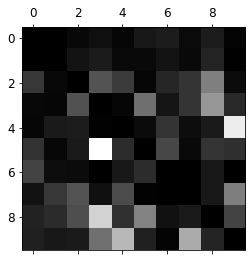

In [43]:
#Graphs the confusion matrix in gray

row_sums3 = conf_mx3.sum(axis=1, keepdims=True)
norm_conf_mx3 = conf_mx3 / row_sums3
np.fill_diagonal(norm_conf_mx3, 0)
plt.matshow(norm_conf_mx3, cmap=plt.cm.gray)
plt.show()

In [0]:
#Works Cited.

#Note, code was reviewed and utilized from the following sources.

# https://github.com/arunkv/kaggle-digit-recognizer/blob/master/output/digitrecognizer.model.best.hdf5
#https://colab.research.google.com/drive/1M7hXbshwybEKlUcf3RgrDKbCrr_NLa9U#scrollTo=afunvphfjqId
